In [1]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import fiona
import rasterio.mask
from descartes import PolygonPatch
from rasterio.plot import show
from tqdm import tqdm
import datetime
import random
from sklearn.preprocessing import StandardScaler

In [15]:
plt.style.use('dark_background')

In [2]:
ea_boundary = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/AdminBoundaries/EastAfrica/EastAfrica.shp'

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Africa_basemap = world[world['continent'] == 'Africa']
EA_countries = ['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Sudan', 'S. Sudan', 'Somalia', 'Somaliland', 'South Sudan', 'Tanzania', 'Uganda']
EastAfrica_basemap = world[world['name'].isin(EA_countries)]
#EastAfrica_basemap.to_file(Admin_boundaries + 'EastAfrica_countries.shp')

In [4]:
EA_prediction_skill = '/home/rgreen/DroughtEDM/Data/EA_prediction_skill/'

In [8]:
Africa_simplex = '/home/rgreen/DroughtEDM/Data/Africa_simplex/ndvi_multi_anom/'

In [8]:
def mask_raster_shp(shp, raster, out_name, in_dir, out_dir):
    
    '''
    This function masks a raster to the shape of a smaller shapefile and creates a new raster
    
    '''
    with fiona.open(shp, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]
    with rasterio.open(in_dir + raster) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, nodata = 0, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rasterio.open(out_dir + out_name, "w", **out_meta) as dest:
        out_image[out_image == 0] = np.nan  
        dest.write(out_image)

In [9]:
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full.tif', 'ndvi_eastafrica_simplex_multi_full_clip.tif', EA_prediction_skill, EA_prediction_skill)
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10.tif', 'ndvi_eastafrica_simplex_multi_full_ed_10_clip.tif', EA_prediction_skill, EA_prediction_skill)


In [10]:
ndvi_eastafrica_simplex_multi_full_clip = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_clip.tif')
ndvi_eastafrica_simplex_multi_full_clip_ed10 = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed_10_clip.tif')


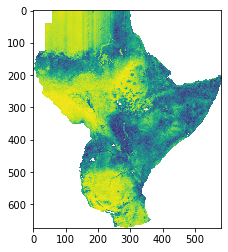

In [11]:
plt.imshow(ndvi_eastafrica_simplex_multi_full_clip.read(1))

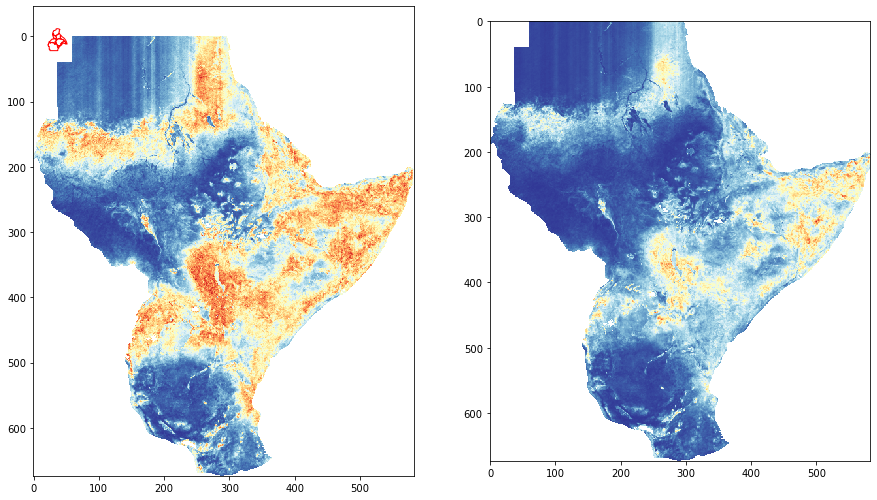

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(ndvi_eastafrica_simplex_multi_full_clip.read(1), cmap = 'RdYlBu')
ax2.imshow(ndvi_eastafrica_simplex_multi_full_clip_ed10.read(1), cmap = 'RdYlBu')
# #show(ond_ndvi_uni, ax=ax, cmap = 'RdBu')

#ax1.plot(EastAfrica_basemap)
# #zoom into East Africa
EastAfrica_basemap.plot(ax=ax1, facecolor='none', edgecolor='red')
# plt.axis([20, 55,-15,25])


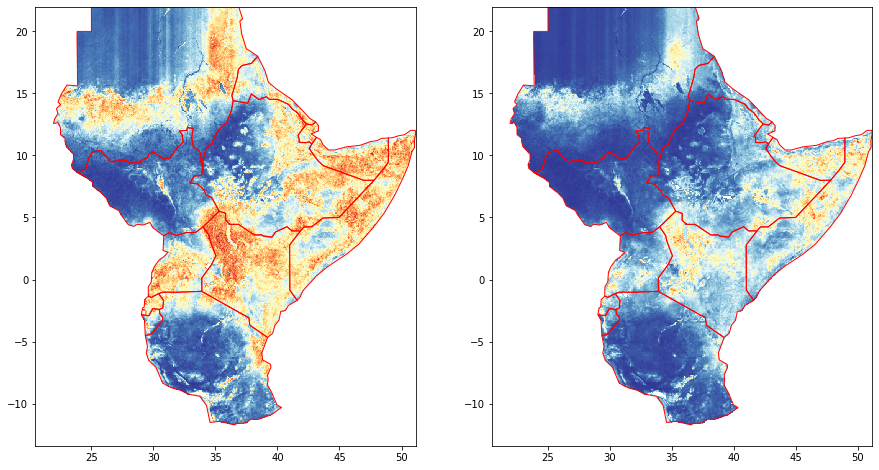

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

show(ndvi_eastafrica_simplex_multi_full_clip, ax = ax1, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_clip_ed10, ax= ax2, cmap = 'RdYlBu')
# #show(ond_ndvi_uni, ax=ax, cmap = 'RdBu')

#ax1.plot(EastAfrica_basemap)
# #zoom into East Africa
EastAfrica_basemap.plot(ax=ax1, facecolor='none', edgecolor='red')
EastAfrica_basemap.plot(ax=ax2, facecolor='none', edgecolor='red')
#plt.axis([20, 55,-15,25])
plt.savefig('/home/rgreen/DroughtEDM/Figures/ea_simplex_ed2_10.png', dpi = 400)

Create scalebar

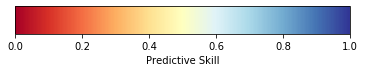

In [14]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Predictive Skill')  

plt.savefig('/home/rgreen/colorbar_rdylbu', dpi = 300)

In [ ]:
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10_bo.tif', 'ndvi_eastafrica_simplex_multi_full_ed10_bo_clip.tif', EA_prediction_skill, EA_prediction_skill)
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10_ci.tif', 'ndvi_eastafrica_simplex_multi_full_ed10_ci_clip.tif', EA_prediction_skill, EA_prediction_skill)
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10_cr.tif', 'ndvi_eastafrica_simplex_multi_full_ed10_cr_clip.tif', EA_prediction_skill, EA_prediction_skill)
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10_sh.tif', 'ndvi_eastafrica_simplex_multi_full_ed10_sh_clip.tif', EA_prediction_skill, EA_prediction_skill)
mask_raster_shp(ea_boundary, 'ndvi_ea_simplex_multi_full_ed10_gr.tif', 'ndvi_eastafrica_simplex_multi_full_ed10_gr_clip.tif', EA_prediction_skill, EA_prediction_skill)


In [6]:
ndvi_eastafrica_simplex_multi_full_ed10_bo = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_ci = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_cr = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_sh = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_gr = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_clip.tif')


In [11]:
ndvi_eastafrica_simplex_multi_full_ed18_bo = rasterio.open(Africa_simplex + 'ndvi_ea_simplex_multi_anom_bo_pi18_ed6_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed18_ci = rasterio.open(Africa_simplex + 'ndvi_ea_simplex_multi_anom_ci_pi18_ed6_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed18_cr = rasterio.open(Africa_simplex + 'ndvi_ea_simplex_multi_anom_cr_pi18_ed6_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed18_sh = rasterio.open(Africa_simplex + 'ndvi_ea_simplex_multi_anom_sh_pi18_ed6_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed18_gr = rasterio.open(Africa_simplex + 'ndvi_ea_simplex_multi_anom_gr_pi18_ed6_clip.tif')


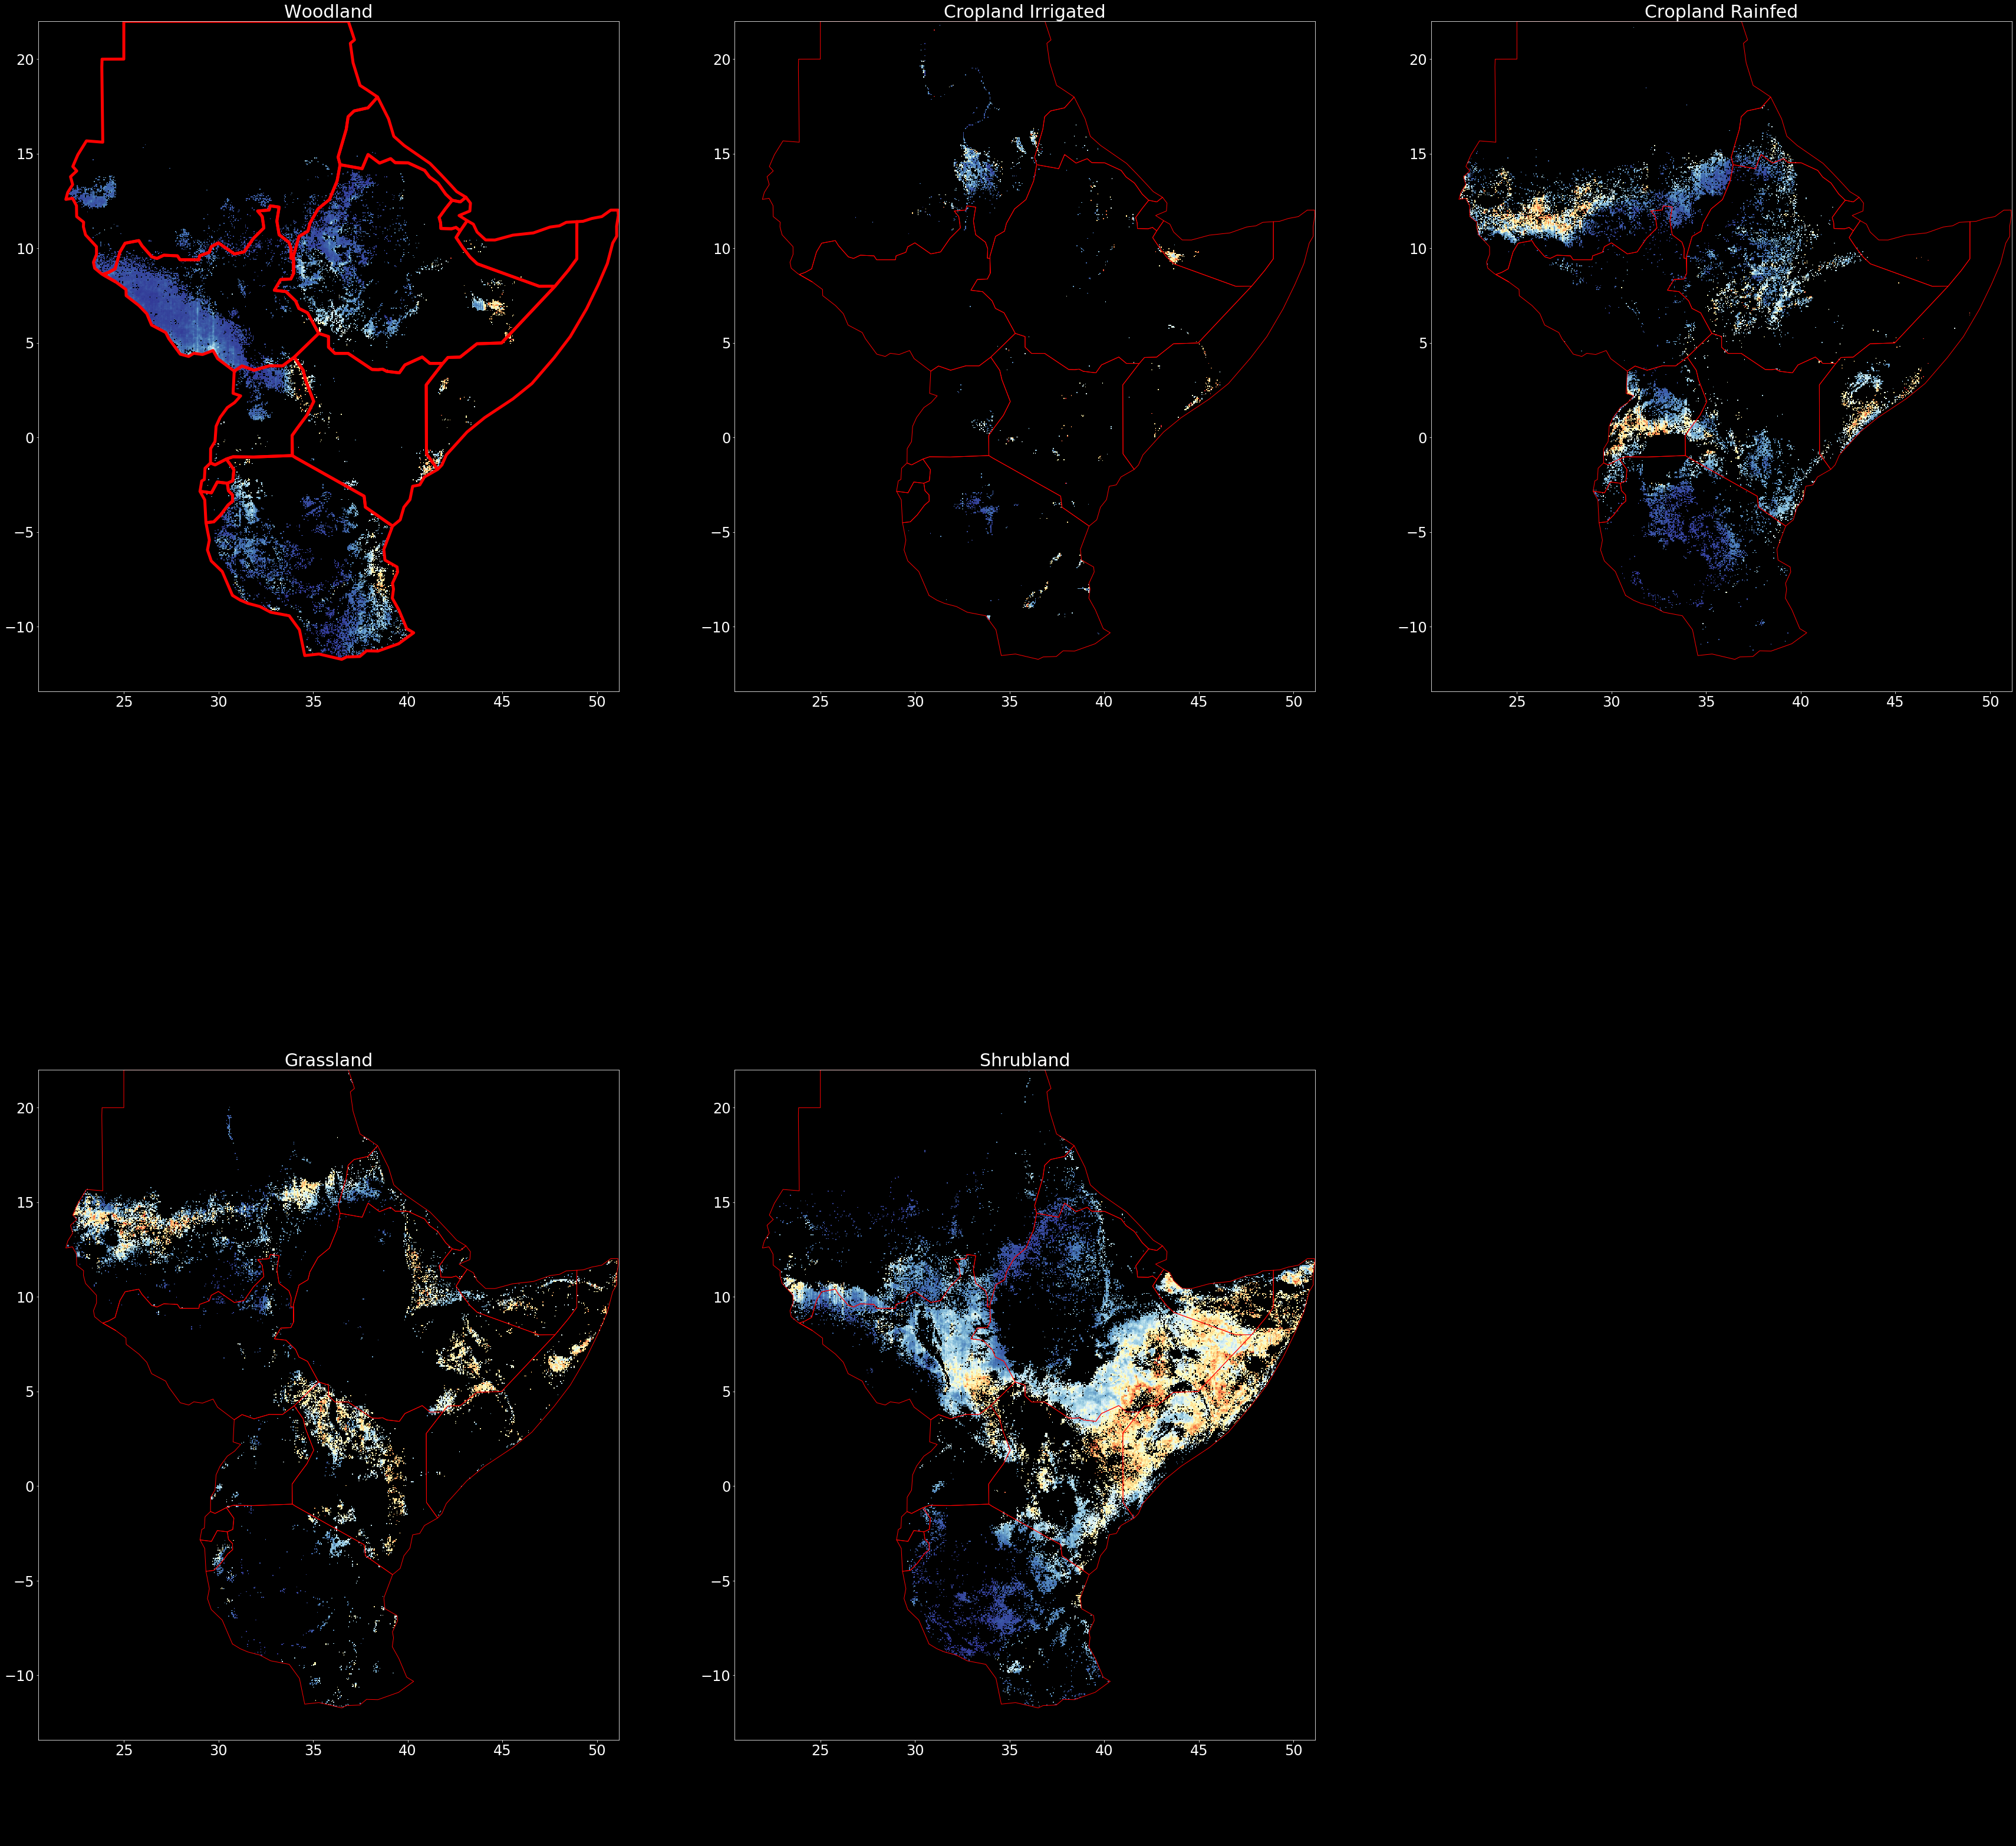

In [17]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(60,60))

show(ndvi_eastafrica_simplex_multi_full_ed10_bo, ax = ax1, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed10_ci, ax= ax2, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed10_cr, ax = ax3, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed10_gr, ax= ax4, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed10_sh, ax = ax5, cmap = 'RdYlBu')
ax6.axis('off')

ax1.set_title('Woodland', fontsize = 30)
ax2.set_title('Cropland Irrigated', fontsize = 30)
ax3.set_title('Cropland Rainfed', fontsize = 30)
ax4.set_title('Grassland', fontsize = 30)
ax5.set_title('Shrubland', fontsize = 30)
#ax1.plot(EastAfrica_basemap)
# #zoom into East Africa
EastAfrica_basemap.plot(ax=ax1, facecolor='none', edgecolor='red')
EastAfrica_basemap.plot(ax=ax2, facecolor='none', edgecolor='red')
EastAfrica_basemap.plot(ax=ax3, facecolor='none', edgecolor='red')
EastAfrica_basemap.plot(ax=ax4, facecolor='none', edgecolor='red')
EastAfrica_basemap.plot(ax=ax5, facecolor='none', edgecolor='red')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 24)
#plt.axis([20, 55,-15,25])
# plt.axis([20, 55,-15,25])
#plt.savefig('/home/rgreen/DroughtEDM/Figures/2x3_simplex_land_covers_ed10.png', dpi = 400)

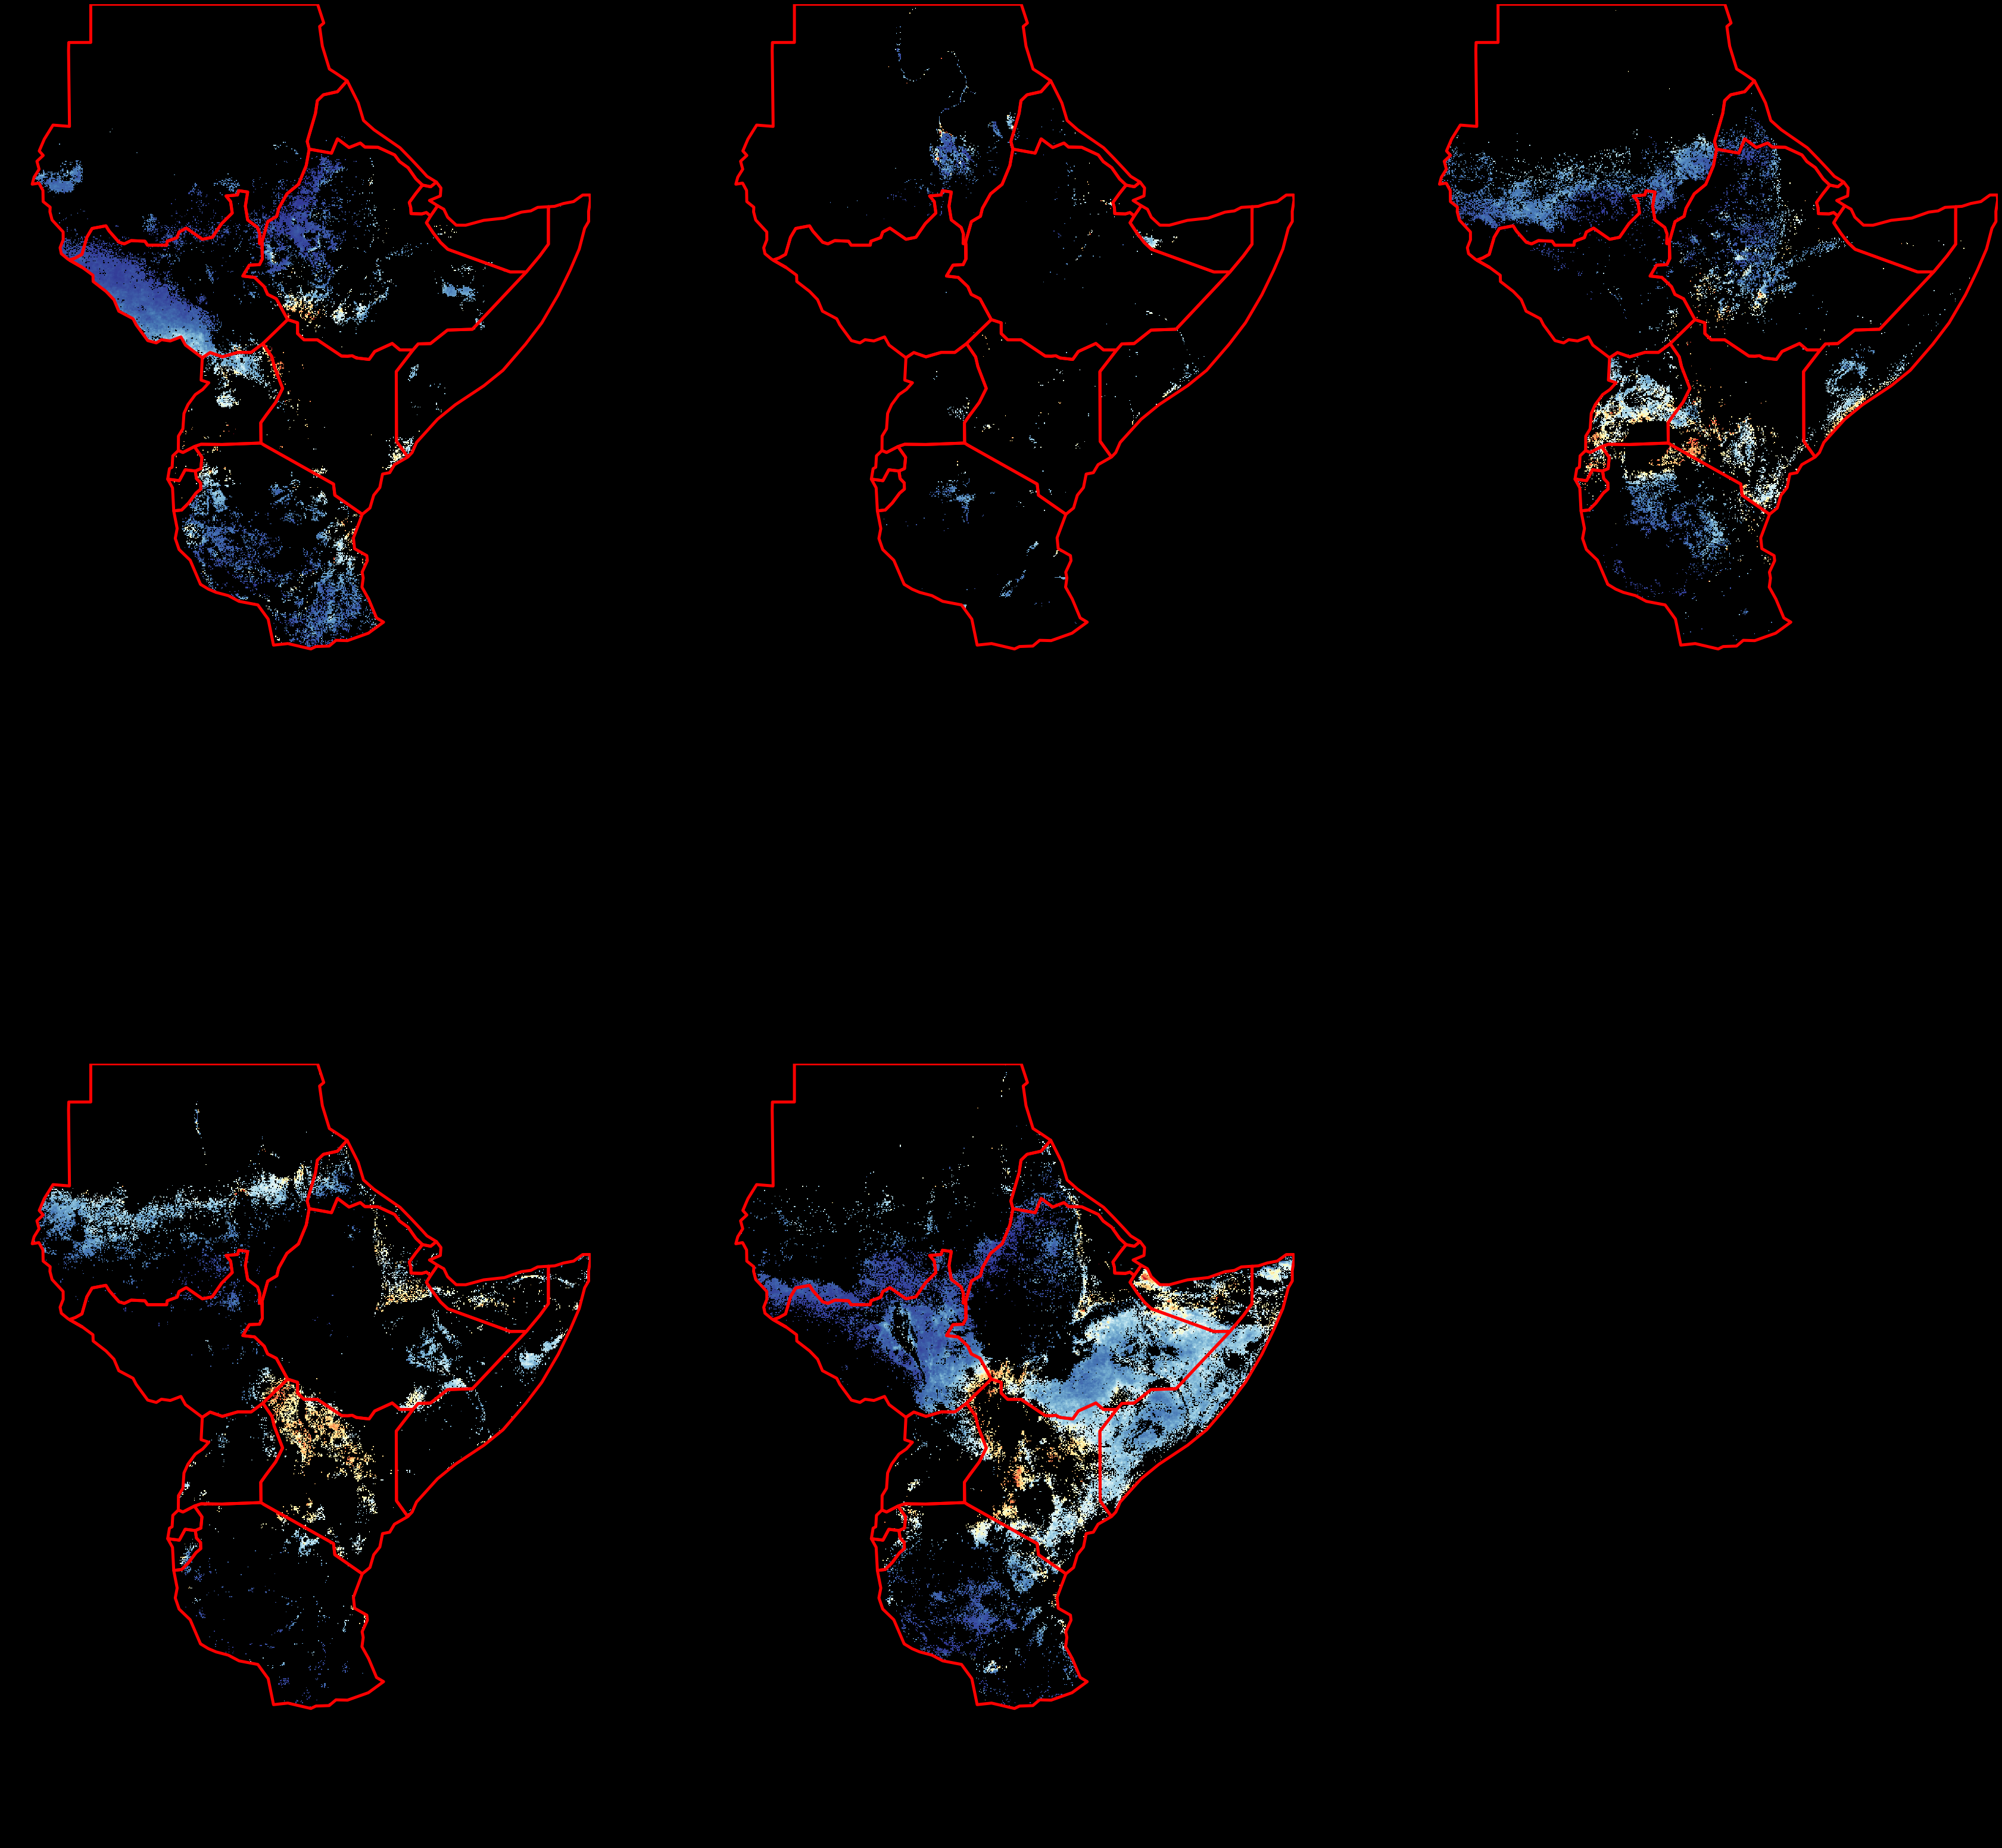

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(60,60))

show(ndvi_eastafrica_simplex_multi_full_ed18_bo, ax = ax1, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed18_ci, ax= ax2, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed18_cr, ax = ax3, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed18_gr, ax= ax4, cmap = 'RdYlBu')
show(ndvi_eastafrica_simplex_multi_full_ed18_sh, ax = ax5, cmap = 'RdYlBu')
ax6.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

ax1.set_title('', fontsize = 30)
ax2.set_title('', fontsize = 30)
ax3.set_title('', fontsize = 30)
ax4.set_title('', fontsize = 30)
ax5.set_title('', fontsize = 30)

# ax1.set_title('Woodland', fontsize = 30)
# ax2.set_title('Cropland Irrigated', fontsize = 30)
# ax3.set_title('Cropland Rainfed', fontsize = 30)
# ax4.set_title('Grassland', fontsize = 30)
# ax5.set_title('Shrubland', fontsize = 30)
#ax1.plot(EastAfrica_basemap)
# #zoom into East Africa
EastAfrica_basemap.plot(ax=ax1, facecolor='none', edgecolor='red', linewidth = 5)
EastAfrica_basemap.plot(ax=ax2, facecolor='none', edgecolor='red', linewidth = 5)
EastAfrica_basemap.plot(ax=ax3, facecolor='none', edgecolor='red', linewidth = 5)
EastAfrica_basemap.plot(ax=ax4, facecolor='none', edgecolor='red', linewidth = 5)
EastAfrica_basemap.plot(ax=ax5, facecolor='none', edgecolor='red', linewidth = 5)

ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 24)
#plt.axis([20, 55,-15,25])
# plt.axis([20, 55,-15,25])
#plt.savefig('/home/rgreen/DroughtEDM/Figures/2x3_simplex_land_covers_pi18.png', dpi = 400)


In [24]:
np.count_nonzero(~np.isnan(ndvi_eastafrica_simplex_multi_full_ed18_ci.read(1)))

2589

In [26]:
np.count_nonzero(~np.isnan(ndvi_eastafrica_simplex_multi_full_ed18_cr.read(1)))

20820

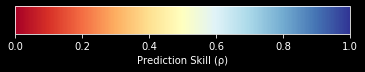

In [23]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Prediction Skill (ρ)')

In [155]:
ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [4]:
list_ndvi_eastafrica_simplex_multi_full_ed10_bo = list(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1).flatten())

NameError: name 'ndvi_eastafrica_simplex_multi_full_ed10_bo' is not defined

In [158]:
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_bo if str(x) != 'nan']

In [3]:
plt.hist(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo)

NameError: name 'cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo' is not defined

In [160]:
mean_bo = np.mean(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo, axis=0)
sd_bo = np.std(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo, axis=0)

final_list_bo = [x for x in cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo if (x < mean - 2 * sd)]
# final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [162]:
max(final_list_bo)

0.5669168

In [165]:
ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)[ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)<= max(final_list_bo)]

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


array([0.33852693, 0.49978787, 0.21219647, ..., 0.55692744, 0.39665148,
       0.56612724], dtype=float32)

In [166]:
np.where(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1))<=max(final_list_bo)

array([[ True,  True,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [185]:
masked_ndvi_eastafrica_simplex_multi_full_ed10_bo = list(np.ma.masked_where(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)<= max(final_list_bo), ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)).flatten())

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


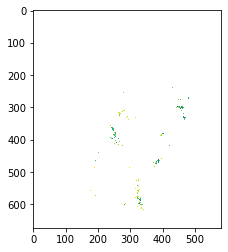

In [187]:
show(np.ma.masked_where(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)>= max(final_list_bo), ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1)))

In [190]:
list_ndvi_eastafrica_simplex_multi_full_ed10_gr = list(ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1).flatten())
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_gr if str(x) != 'nan']

In [196]:
mean_gr = np.mean(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr, axis=0)
sd_gr = np.std(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr, axis=0)

final_list_gr = [x for x in cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr if (x < mean_gr -  sd_gr)]#2*
# final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [197]:
max(final_list_gr)

0.30986056

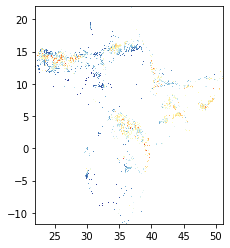

In [206]:
show(ndvi_eastafrica_simplex_multi_full_ed10_gr, cmap = 'RdYlBu')

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


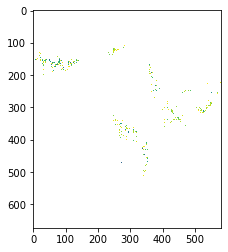

In [202]:
show(np.ma.masked_where(ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1)>= max(final_list_gr), ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1)))

In [3]:
ndvi_single_anom_ed6_pi18 = rasterio.open('/home/rgreen/DroughtEDM/Data/EA_prediction_skill/ndvi_single_anom_ed6_pi18.tif')

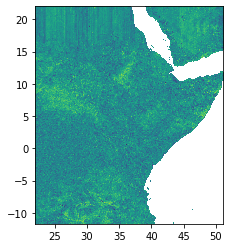

In [4]:
show(ndvi_single_anom_ed6_pi18)